# Importing Python libraries

In [1]:
import numpy as np  # library for numeric calculations   
import pandas as pd # library for reading data 
import seaborn as sns # library for plots 
from matplotlib import cm # library fo plots 
import matplotlib.pyplot as plt # library for plots 
from datetime import datetime # library to get the current time 
import datetime # library for time 
from sklearn.metrics import mean_squared_error # library for evaluation  mse 
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt  # library for evaluation  rmse
from sklearn.metrics import mean_absolute_error # library for evaluation mae 
from prettytable import PrettyTable # library for for comparison in tables 
from plotly.subplots import make_subplots # library for plots 
import plotly.graph_objs as go # library for plots 
from sklearn.linear_model import LinearRegression # library for linear regression model training 
import xgboost # library for xgboost model training 
from sklearn.ensemble import RandomForestRegressor # library for random forest model training 
from sklearn import linear_model # library for ridge model training 
from sklearn.neural_network import MLPRegressor # library for Mlp model training 
from sklearn.svm import SVR # library for SVR model training 
from sklearn.neighbors import KNeighborsRegressor # library for KNN model training 
from statsmodels.tsa.statespace.sarimax import SARIMAX # library for Sarima model training 
from keras.models import Model # library for for LSTM model 
from keras.layers import LSTM, Activation, Input, Embedding # library for LSTM
from keras.layers import Activation # library for RNN 
from keras.models import Sequential # library for RNN 
from keras.layers import Dense, Conv1D, Flatten, Dropout # library for LSTM
import datetime as dt #library for dates 
from binance import Client #library for getting python binance data
from binance import *
from sklearn.model_selection import RandomizedSearchCV #library for seraching best parametr
from keras.wrappers.scikit_learn import KerasClassifier #library for neural network model
from sklearn.model_selection import GridSearchCV #library for searching best parameter
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer  
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer 
import re 
import string
from collections import Counter 
from sklearn import preprocessing
from matplotlib import rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
import tweepy as tw 
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi

from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import spacy
from keras.preprocessing.text import Tokenizer
import matplotlib.cm as cm
from matplotlib import rcParams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import warnings # library to avoid system erros 
warnings.filterwarnings("ignore")  # library to avoid system erros 

C:\Users\callu\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\callu\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# ------------------------------------------------------------------------------------------------------

## Settings

In [2]:
cryptoTicker = "ETH"
cryptoPair = "USDT"

trainTestSplit = 0.8

### Loading the whale data

In [3]:
data=pd.read_csv('Datasets/dataFileWhaleADA.csv')

In [4]:
li = data['tweet'].str.lower().str.cat(sep=' ')

# Getting Tokenization of the text

In [5]:
data = data[['date','time','tweet']]
data['tweet'].head()

0    🚨 🚨  20,000,000 #USDT (20,000,000 USD) transfe...
1    🚨 🚨  29,999,975 #USDT (29,999,975 USD) transfe...
2    🚨 🚨  29,999,975 #USDT (29,999,975 USD) transfe...
3    🚨 🚨 🚨  29,999,998 #USDT (29,999,998 USD) trans...
4    🚨 🚨 🚨 🚨 🚨 🚨  69,997,439 #USDT (69,997,439 USD)...
Name: tweet, dtype: object

In [6]:
#nums = re.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)', data['tweet'][0]
#data['amountTransfer'] = re.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)', data['tweet'])[0]
data['amountTransfer'] = data['tweet'].str.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)')
data['amountTransfer'] = data['amountTransfer'].str[1]

In [7]:
data

,date,time,tweet,amountTransfer
0,2021-12-30,23:24:22,"🚨 🚨 20,000,000 #USDT (20,000,000 USD) transfe...","20,000,000"
1,2021-12-30,23:21:26,"🚨 🚨 29,999,975 #USDT (29,999,975 USD) transfe...","29,999,975"
2,2021-12-30,23:17:39,"🚨 🚨 29,999,975 #USDT (29,999,975 USD) transfe...","29,999,975"
3,2021-12-30,23:16:11,"🚨 🚨 🚨 29,999,998 #USDT (29,999,998 USD) trans...","29,999,998"
4,2021-12-30,21:49:44,"🚨 🚨 🚨 🚨 🚨 🚨 69,997,439 #USDT (69,997,439 USD)...","69,997,439"
...,...,...,...,...
7402,2021-01-01,11:18:54,"🚨 11,013,200 #USDT (11,002,558 USD) transferr...","11,002,558"
7403,2021-01-01,10:38:33,"🚨 10,033,000 #USDT (10,024,322 USD) transferr...","10,024,322"
7404,2021-01-01,10:37:25,"🚨 12,022,800 #USDT (12,013,635 USD) transferr...","12,013,635"
7405,2021-01-01,10:34:18,"🚨 🚨 🚨 🚨 🚨 50,000,000 #USDT (50,023,238 USD) t...","50,023,238"


# SentimentIntensityAnalyzer for getting sentiments

### Loading dataset price data

In [8]:
api_key = '//' 
api_secret = '//'
client = Client(api_key, api_secret)
klines = client.get_historical_klines("ADAUSDT", Client.KLINE_INTERVAL_4HOUR, "2021-01-01", "2022-01-01")
priceData = pd.DataFrame(klines)
priceData.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
priceData.index = [dt.datetime.fromtimestamp(x/1000.0) for x in priceData.close_time]
#priceData=priceData[['open', 'high', 'low', 'close']]
priceData=priceData[['close']]
priceData.head()
priceData = priceData.iloc[:-1 , :]

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [9]:
priceData.head() # showing the first 5 rows of data

,close
2021-01-01 03:59:59.999,0.18292000
2021-01-01 07:59:59.999,0.17955000
2021-01-01 11:59:59.999,0.17950000
2021-01-01 15:59:59.999,0.18055000
2021-01-01 19:59:59.999,0.17432000


### Five last records of data

In [10]:
priceData.tail() # showing the last 5 rows of data

,close
2021-12-31 07:59:59.999,1.32900000
2021-12-31 11:59:59.999,1.36100000
2021-12-31 15:59:59.999,1.35500000
2021-12-31 19:59:59.999,1.28600000
2021-12-31 23:59:59.999,1.30800000


### Coloumns/features in data

In [11]:
priceData.columns #columns in data

Index(['close'], dtype='object')

### Length of data

In [12]:
print('lenght of data is', len(priceData)) #lenght of data

lenght of data is 2190


### Shape of data

In [13]:
data.shape #shape of data

(7407, 4)

### Data information

In [14]:
data.info() #information of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7407 entries, 0 to 7406
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            7407 non-null   object
 1   time            7407 non-null   object
 2   tweet           7407 non-null   object
 3   amountTransfer  7407 non-null   object
dtypes: object(4)
memory usage: 231.6+ KB


In [15]:
data.head(10-8)

,date,time,tweet,amountTransfer
0,2021-12-30,23:24:22,"🚨 🚨 20,000,000 #USDT (20,000,000 USD) transfe...","20,000,000"
1,2021-12-30,23:21:26,"🚨 🚨 29,999,975 #USDT (29,999,975 USD) transfe...","29,999,975"


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7407 entries, 0 to 7406
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            7407 non-null   object
 1   time            7407 non-null   object
 2   tweet           7407 non-null   object
 3   amountTransfer  7407 non-null   object
dtypes: object(4)
memory usage: 231.6+ KB


In [17]:
#data=data.head(1000)

### Data types of all coloumns

In [18]:
data.dtypes #data types of data

date              object
time              object
tweet             object
amountTransfer    object
dtype: object

### Checking missing Values

In [19]:
data[data.isnull().any(axis=1)].head() #checking the null values 

,date,time,tweet,amountTransfer


### Count of missing values

In [20]:
np.sum(data.isnull().any(axis=1)) #checking the null values 

0

### Is there any missing values?

In [21]:
data.isnull().values.any() #checking the null values 

False

In [22]:
data.iloc[9:25]

,date,time,tweet,amountTransfer
9,2021-12-30,19:51:28,"🚨 🚨 🚨 🚨 🚨 🚨 69,997,479 #USDT (69,997,479 USD)...","69,997,479"
10,2021-12-30,19:27:23,"🚨 🚨 🚨 🚨 🚨 🚨 69,997,479 #USDT (69,997,479 USD)...","69,997,479"
11,2021-12-30,17:59:53,"🚨 19,997,499 #USDT (19,997,499 USD) transferr...","19,997,499"
12,2021-12-30,17:41:00,"🚨 19,997,519 #USDT (19,997,519 USD) transferr...","19,997,519"
13,2021-12-30,17:13:15,"🚨 🚨 21,200,749 #USDT (21,200,749 USD) transfe...","21,200,749"
14,2021-12-30,17:04:52,"🚨 19,997,519 #USDT (19,997,519 USD) transferr...","19,997,519"
15,2021-12-30,16:47:03,"🚨 19,997,539 #USDT (19,997,539 USD) transferr...","19,997,539"
16,2021-12-30,16:37:27,"🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 83,014,254 #USDT (83,014,254 ...","83,014,254"
17,2021-12-30,16:24:35,"🚨 19,997,539 #USDT (19,997,539 USD) transferr...","19,997,539"
18,2021-12-30,16:24:35,"🚨 🚨 🚨 🚨 49,999,976 #USDT (49,999,976 USD) tra...","49,999,976"


### Counts of missing values in each column

In [23]:
data.isnull().sum() #checking the null values columns wise 

date              0
time              0
tweet             0
amountTransfer    0
dtype: int64

In [24]:
#priceData['open']=priceData['open'].astype(float)
#priceData['high']=priceData['high'].astype(float)
#priceData['low']=priceData['low'].astype(float)
priceData['close']=priceData['close'].astype(float)

### Spliting date into day, month and year

In [25]:
priceData['date'] = priceData.index # taking dates in date column 
priceData.sort_index(ascending=True, inplace=True)
priceData['Month'] = priceData['date'].dt.month # extracting months from data
priceData['Day'] = priceData['date'].dt.day # extracting day from data
priceData['Year'] = priceData['date'].dt.year # extracting year from data
priceData['Hour'] = priceData['date'].dt.hour # extracting year from data
priceData['Minutes'] = priceData['date'].dt.minute # extracting year from data

### Close price with respect to year 

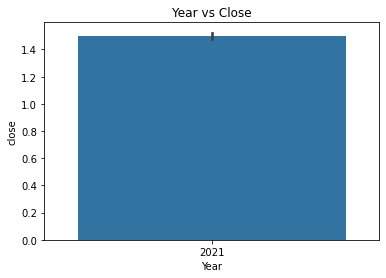

In [26]:
sns.barplot(x='Year', y='close', data=priceData).set(title='Year vs Close') # plotting the comparison of year and close price
plt.show() #showing the plot 

### Close price with respect to Month 

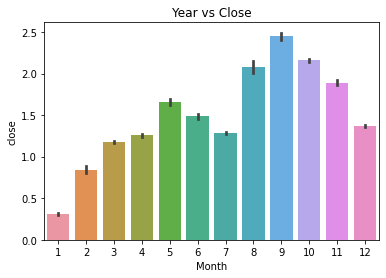

In [27]:
sns.barplot(x='Month', y='close', data=priceData).set(title='Year vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

# ------------------------------------------------------------------------------------------------------

# Merging whale alerts with price data

# ------------------------------------------------------------------------------------------------------

In [28]:
data.head()

,date,time,tweet,amountTransfer
0,2021-12-30,23:24:22,"🚨 🚨 20,000,000 #USDT (20,000,000 USD) transfe...","20,000,000"
1,2021-12-30,23:21:26,"🚨 🚨 29,999,975 #USDT (29,999,975 USD) transfe...","29,999,975"
2,2021-12-30,23:17:39,"🚨 🚨 29,999,975 #USDT (29,999,975 USD) transfe...","29,999,975"
3,2021-12-30,23:16:11,"🚨 🚨 🚨 29,999,998 #USDT (29,999,998 USD) trans...","29,999,998"
4,2021-12-30,21:49:44,"🚨 🚨 🚨 🚨 🚨 🚨 69,997,439 #USDT (69,997,439 USD)...","69,997,439"


In [29]:
priceData.head(10)

,close,date,Month,Day,Year,Hour,Minutes
2021-01-01 03:59:59.999,0.18292,2021-01-01 03:59:59.999,1,1,2021,3,59
2021-01-01 07:59:59.999,0.17955,2021-01-01 07:59:59.999,1,1,2021,7,59
2021-01-01 11:59:59.999,0.17950,2021-01-01 11:59:59.999,1,1,2021,11,59
2021-01-01 15:59:59.999,0.18055,2021-01-01 15:59:59.999,1,1,2021,15,59
2021-01-01 19:59:59.999,0.17432,2021-01-01 19:59:59.999,1,1,2021,19,59
2021-01-01 23:59:59.999,0.17509,2021-01-01 23:59:59.999,1,1,2021,23,59
2021-01-02 03:59:59.999,0.17501,2021-01-02 03:59:59.999,1,2,2021,3,59
2021-01-02 07:59:59.999,0.17242,2021-01-02 07:59:59.999,1,2,2021,7,59
2021-01-02 11:59:59.999,0.17204,2021-01-02 11:59:59.999,1,2,2021,11,59
2021-01-02 15:59:59.999,0.17886,2021-01-02 15:59:59.999,1,2,2021,15,59


In [30]:
priceData['whaleCount'] = 0

In [31]:
for i, row in enumerate(data.itertuples(), 1):
    if row.time >= "00:00:00" and row.time < "04:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "03:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "03:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "04:00:00" and row.time < "08:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "07:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "07:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "08:00:00" and row.time < "12:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "11:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "11:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "12:00:00" and row.time < "16:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "15:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "15:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "16:00:00" and row.time < "20:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "19:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "19:59:59" + ".999"), 'whaleCount'] += 1
    else:
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "23:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "23:59:59" + ".999"), 'whaleCount'] += 1

In [32]:
priceData.loc[priceData['whaleCount'] > 0]

,close,date,Month,Day,Year,Hour,Minutes,whaleCount
2021-01-01 11:59:59.999,0.17950,2021-01-01 11:59:59.999,1,1,2021,11,59,12
2021-01-01 15:59:59.999,0.18055,2021-01-01 15:59:59.999,1,1,2021,15,59,8
2021-01-01 23:59:59.999,0.17509,2021-01-01 23:59:59.999,1,1,2021,23,59,2
2021-01-02 11:59:59.999,0.17204,2021-01-02 11:59:59.999,1,2,2021,11,59,2
2021-01-02 15:59:59.999,0.17886,2021-01-02 15:59:59.999,1,2,2021,15,59,1
...,...,...,...,...,...,...,...,...
2021-12-29 19:59:59.999,1.36200,2021-12-29 19:59:59.999,12,29,2021,19,59,7
2021-12-30 11:59:59.999,1.36100,2021-12-30 11:59:59.999,12,30,2021,11,59,7
2021-12-30 15:59:59.999,1.35100,2021-12-30 15:59:59.999,12,30,2021,15,59,19
2021-12-30 19:59:59.999,1.35800,2021-12-30 19:59:59.999,12,30,2021,19,59,15


# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

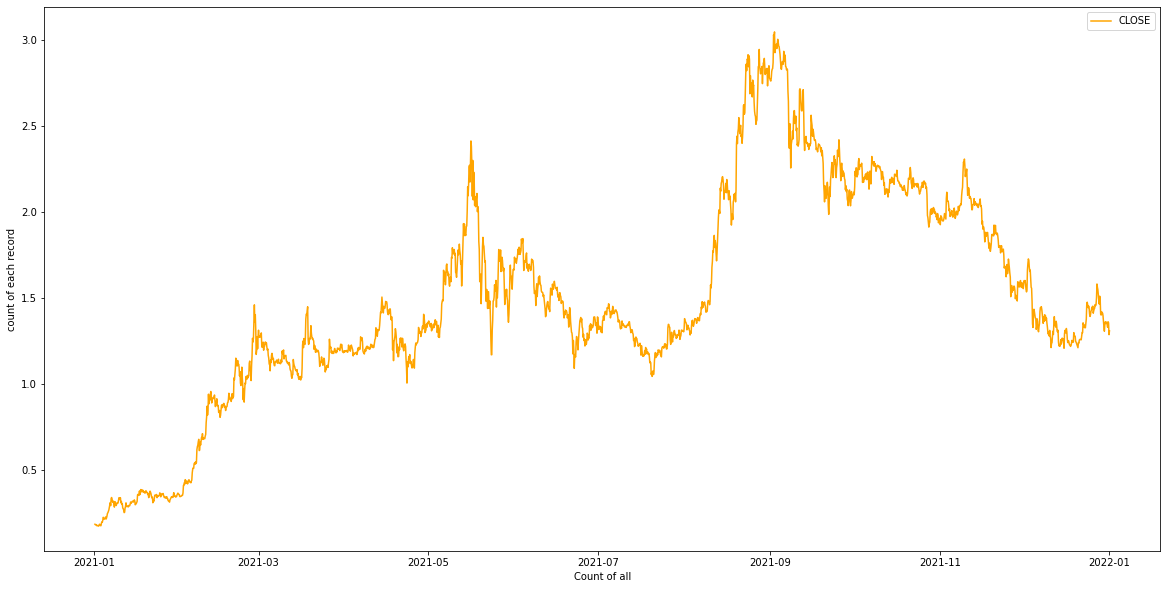

In [33]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot 
plt.subplot(1,1,1) #plot setting 
plt.plot(priceData.index, priceData['close'].values,color='orange',label='CLOSE') # plotting Close price 
plt.xlabel('Count of all') # x axis 
plt.ylabel('count of each record') # y axis 
plt.legend(loc='best') #legend name as Close 
plt.show() # showing the plot 

# ------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [34]:
X=priceData.drop(columns=['close','date']) #dropping the 'Close','date'
X[X< 0] = 0 #making all negative values as 0
X #input features 

,Month,Day,Year,Hour,Minutes,whaleCount
2021-01-01 03:59:59.999,1,1,2021,3,59,0
2021-01-01 07:59:59.999,1,1,2021,7,59,0
2021-01-01 11:59:59.999,1,1,2021,11,59,12
2021-01-01 15:59:59.999,1,1,2021,15,59,8
2021-01-01 19:59:59.999,1,1,2021,19,59,0
...,...,...,...,...,...,...
2021-12-31 07:59:59.999,12,31,2021,7,59,0
2021-12-31 11:59:59.999,12,31,2021,11,59,0
2021-12-31 15:59:59.999,12,31,2021,15,59,0
2021-12-31 19:59:59.999,12,31,2021,19,59,0


### Taking target as output

In [35]:
y=priceData['close'] # output close 
y #output 

2021-01-01 03:59:59.999    0.18292
2021-01-01 07:59:59.999    0.17955
2021-01-01 11:59:59.999    0.17950
2021-01-01 15:59:59.999    0.18055
2021-01-01 19:59:59.999    0.17432
                            ...   
2021-12-31 07:59:59.999    1.32900
2021-12-31 11:59:59.999    1.36100
2021-12-31 15:59:59.999    1.35500
2021-12-31 19:59:59.999    1.28600
2021-12-31 23:59:59.999    1.30800
Name: close, Length: 2190, dtype: float64

### Spliting the data into training and Testing

In [36]:
X_train = X[:int(trainTestSplit*(len(X)))] # training input features split 
X_test = X[int(trainTestSplit*(len(X))):]  # testing input features split 

y_train = y[:int(trainTestSplit*(len(y)))]  # training output split 
y_test = y[int(trainTestSplit*(len(y))):] # testing output split 

# --------------------------------------------------------------------------------------------------

# SARIMAX Model

In [37]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])

    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['whaleCount'],order=arima_order,seasonal_order=(1,1,1,12))
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(priceData, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.542
ARIMA(0, 0, 1) RMSE=0.547
ARIMA(0, 0, 2) RMSE=0.552
ARIMA(0, 1, 0) RMSE=0.797
ARIMA(0, 1, 1) RMSE=0.796
ARIMA(0, 1, 2) RMSE=0.795
ARIMA(0, 2, 0) RMSE=3.384
ARIMA(0, 2, 1) RMSE=0.468
ARIMA(0, 2, 2) RMSE=0.424
ARIMA(1, 0, 0) RMSE=0.392
ARIMA(1, 0, 1) RMSE=0.503
ARIMA(1, 0, 2) RMSE=0.267
ARIMA(1, 1, 0) RMSE=0.796
ARIMA(1, 1, 1) RMSE=0.796
ARIMA(1, 1, 2) RMSE=0.784
ARIMA(1, 2, 0) RMSE=1.631
ARIMA(1, 2, 1) RMSE=0.432
ARIMA(1, 2, 2) RMSE=0.492
ARIMA(2, 0, 0) RMSE=0.298
ARIMA(2, 0, 1) RMSE=0.759
ARIMA(2, 0, 2) RMSE=0.536
ARIMA(2, 1, 0) RMSE=0.792
ARIMA(2, 1, 1) RMSE=0.779
ARIMA(2, 1, 2) RMSE=0.791
ARIMA(2, 2, 0) RMSE=0.589
ARIMA(2, 2, 1) RMSE=0.417
ARIMA(2, 2, 2) RMSE=0.476
ARIMA(4, 0, 0) RMSE=0.199
ARIMA(4, 0, 1) RMSE=0.527
ARIMA(4, 0, 2) RMSE=0.742
ARIMA(4, 1, 0) RMSE=0.774
ARIMA(4, 1, 1) RMSE=0.772
ARIMA(4, 1, 2) RMSE=0.785
ARIMA(4, 2, 0) RMSE=1.532
ARIMA(4, 2, 1) RMSE=0.148
ARIMA(4, 2, 2) RMSE=0.342
ARIMA(6, 0, 0) RMSE=0.249
ARIMA(6, 0, 1) RMSE=0.461
ARIMA(6, 0, 

In [38]:
Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['whaleCount'],order=(best_cfg),seasonal_order=(1,1,1,12))
results=model.fit()

In [39]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
y_pred_test = pd.Series(preds.tolist(), index = test_data.index)

### Best Parameter selected

In [40]:
best_cfg

(10, 2, 2)

# Evaluation Measures on Test data

# MSE

In [41]:
test_mse1=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse1,5)) #pritng the results 

Mean Squared Error:  0.02125


# MAE

In [42]:
test_MAE1=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE1,5)) #pritng the results 

Mean Absolute Error:  0.1221


# RMSE

In [43]:
test_rmse1=np.sqrt(test_mse1) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse1,5)) #pritng the results 

Mean Squared Error:  0.14576


# MAPE

In [44]:
test_mape1=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape1,5)) #pritng the results 

Mean Absolute Error:  0.07824


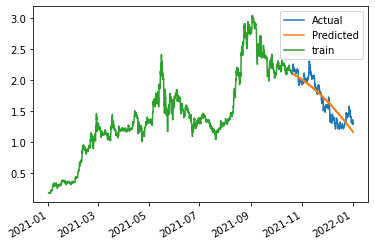

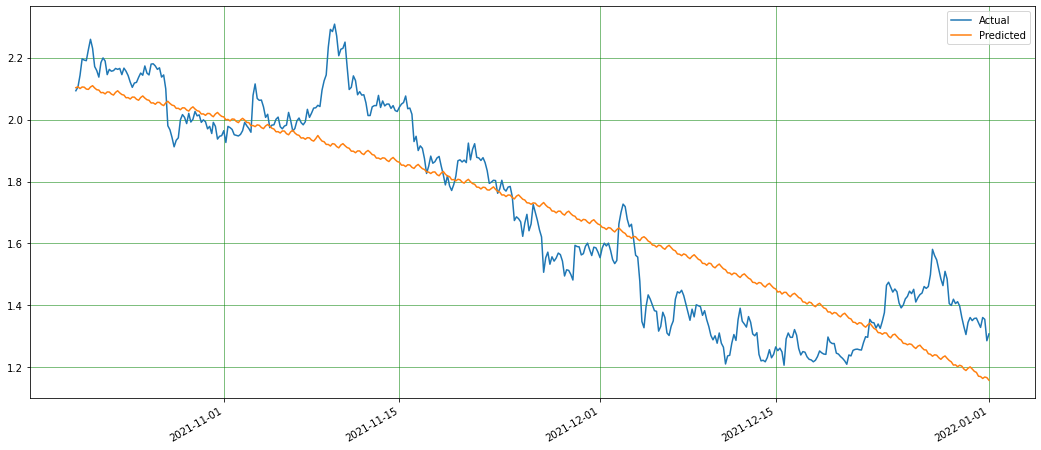

In [45]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# ARIMAX Model

### Parametrs

In [46]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])

    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['whaleCount'],order=arima_order)
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(priceData, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1.522
ARIMA(0, 0, 1) RMSE=1.725
ARIMA(0, 0, 2) RMSE=1.726
ARIMA(0, 1, 0) RMSE=0.527
ARIMA(0, 1, 1) RMSE=0.527
ARIMA(0, 1, 2) RMSE=0.527
ARIMA(0, 2, 0) RMSE=3.042
ARIMA(0, 2, 1) RMSE=0.799
ARIMA(0, 2, 2) RMSE=0.798
ARIMA(1, 0, 0) RMSE=0.338
ARIMA(1, 0, 1) RMSE=0.358
ARIMA(1, 0, 2) RMSE=0.158
ARIMA(1, 1, 0) RMSE=0.527
ARIMA(1, 1, 1) RMSE=0.527
ARIMA(1, 1, 2) RMSE=0.527
ARIMA(1, 2, 0) RMSE=1.207
ARIMA(1, 2, 1) RMSE=0.794
ARIMA(1, 2, 2) RMSE=0.797
ARIMA(2, 0, 0) RMSE=0.356
ARIMA(2, 0, 1) RMSE=0.375
ARIMA(2, 0, 2) RMSE=0.520
ARIMA(2, 1, 0) RMSE=0.527
ARIMA(2, 1, 1) RMSE=0.527
ARIMA(2, 1, 2) RMSE=0.528
ARIMA(2, 2, 0) RMSE=0.167
ARIMA(2, 2, 1) RMSE=0.786
ARIMA(2, 2, 2) RMSE=0.797
ARIMA(4, 0, 0) RMSE=0.970
ARIMA(4, 0, 1) RMSE=0.161
ARIMA(4, 0, 2) RMSE=0.322
ARIMA(4, 1, 0) RMSE=0.527
ARIMA(4, 1, 1) RMSE=0.527
ARIMA(4, 1, 2) RMSE=0.527
ARIMA(4, 2, 0) RMSE=0.839
ARIMA(4, 2, 1) RMSE=0.663
ARIMA(4, 2, 2) RMSE=0.299
ARIMA(6, 0, 0) RMSE=0.746
ARIMA(6, 0, 1) RMSE=0.255
ARIMA(6, 0, 

In [47]:
Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['whaleCount'],order=(best_cfg))
results=model.fit()

### Best Parameter selected

In [48]:
best_cfg

(10, 2, 2)

In [49]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
y_pred_test = pd.Series(preds.tolist(), index = test_data.index)

# Evaluation Measures on Test data

# MSE

In [50]:
test_mse2=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse2,5)) #pritng the results 

Mean Squared Error:  0.02171


# MAE

In [51]:
test_MAE2=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE2,5)) #pritng the results 

Mean Absolute Error:  0.12291


# RMSE

In [52]:
test_rmse2=np.sqrt(test_mse2) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse2,5)) #pritng the results 

Mean Squared Error:  0.14734


# MAPE

In [53]:
test_mape2=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape2,5)) #pritng the results 

Mean Absolute Error:  0.07673


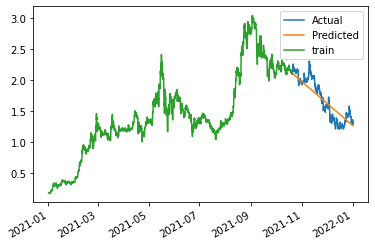

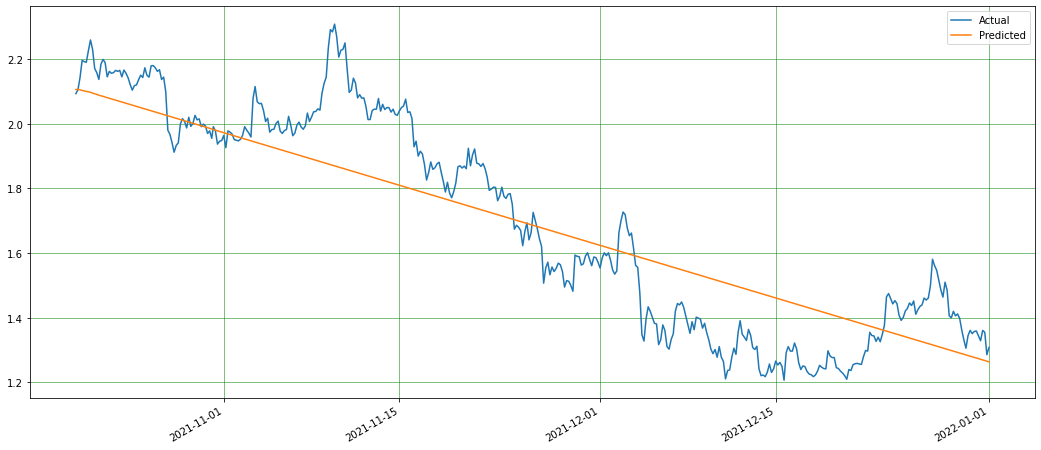

In [54]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# MLP Regression Model

### Parametrs

In [55]:
params = { 
    'max_iter': [100,200,300,400,500,600],
    'momentum':[0.7,0.8,0.9],
    'learning_rate_init':[0.001,0.002,0.004],
    'hidden_layer_sizes':[(100,),(300,),(200,)]
}

In [56]:
%%time
mlp=MLPRegressor(verbose=True) # calling MLP model for training 
Model_R = RandomizedSearchCV(estimator = mlp, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Iteration 1, loss = 3616.88335092
Iteration 2, loss = 1250.97639790
Iteration 3, loss = 745.71086191
Iteration 4, loss = 247.09390381
Iteration 5, loss = 373.71210804
Iteration 6, loss = 44.23517322
Iteration 7, loss = 150.64789037
Iteration 8, loss = 14.37182352
Iteration 9, loss = 54.92423183
Iteration 10, loss = 6.02264715
Iteration 11, loss = 19.89983418
Iteration 12, loss = 2.48059593
Iteration 13, loss = 6.35687985
Iteration 14, loss = 1.71975315
Iteration 15, loss = 1.63390717
Iteration 16, loss = 1.24467932
Iteration 17, loss = 0.47148647
Iteration 18, loss = 0.65924704
Iteration 19, loss = 0.36182093
Iteration 20, loss = 0.33489983
Iteration 21, loss = 0.34470184
Iteration 22, loss = 0.27642459
Iteration 23, loss = 0.28119997
Iteration 24, loss = 0.27247545
Iteration 25, loss = 0.25712683
Iteration 26, loss = 0.25547413
Iteration 27, loss = 0.25483104
Iteration 28, loss = 0.25713677
Iteration 29, loss = 0.25364462
Iteration 30, loss = 0.24753355
Iteration 31, loss = 0.24587368

Iteration 96, loss = 0.08014389
Iteration 97, loss = 0.08025126
Iteration 98, loss = 0.08029359
Iteration 99, loss = 0.08409869
Iteration 100, loss = 0.08597712
Iteration 101, loss = 0.10731165
Iteration 102, loss = 0.08518889
Iteration 103, loss = 0.06968520
Iteration 104, loss = 0.06855373
Iteration 105, loss = 0.06670604
Iteration 106, loss = 0.06549583
Iteration 107, loss = 0.06586738
Iteration 108, loss = 0.07139106
Iteration 109, loss = 0.06573417
Iteration 110, loss = 0.06040581
Iteration 111, loss = 0.05864891
Iteration 112, loss = 0.05588438
Iteration 113, loss = 0.05410414
Iteration 114, loss = 0.06458765
Iteration 115, loss = 0.06449512
Iteration 116, loss = 0.05903643
Iteration 117, loss = 0.05098339
Iteration 118, loss = 0.05507289
Iteration 119, loss = 0.04770628
Iteration 120, loss = 0.04586233
Iteration 121, loss = 0.04860733
Iteration 122, loss = 0.04382173
Iteration 123, loss = 0.04285602
Iteration 124, loss = 0.04910694
Iteration 125, loss = 0.04801758
Iteration 126,

Iteration 46, loss = 0.29550775
Iteration 47, loss = 0.28433897
Iteration 48, loss = 0.28258421
Iteration 49, loss = 0.27123106
Iteration 50, loss = 0.26062748
Iteration 51, loss = 0.27064578
Iteration 52, loss = 0.25221445
Iteration 53, loss = 0.24353459
Iteration 54, loss = 0.24947405
Iteration 55, loss = 0.23780032
Iteration 56, loss = 0.23122400
Iteration 57, loss = 0.24438309
Iteration 58, loss = 0.24888622
Iteration 59, loss = 0.23759978
Iteration 60, loss = 0.23133119
Iteration 61, loss = 0.21949268
Iteration 62, loss = 0.21756143
Iteration 63, loss = 0.22789330
Iteration 64, loss = 0.21678653
Iteration 65, loss = 0.21384635
Iteration 66, loss = 0.21310794
Iteration 67, loss = 0.20999985
Iteration 68, loss = 0.20867441
Iteration 69, loss = 0.20765238
Iteration 70, loss = 0.20520307
Iteration 71, loss = 0.20390012
Iteration 72, loss = 0.20714587
Iteration 73, loss = 0.20184429
Iteration 74, loss = 0.20190253
Iteration 75, loss = 0.19980403
Iteration 76, loss = 0.19726976
Iteratio

Iteration 159, loss = 0.13166178
Iteration 160, loss = 0.13034783
Iteration 161, loss = 0.12947251
Iteration 162, loss = 0.12888987
Iteration 163, loss = 0.12989497
Iteration 164, loss = 0.12763459
Iteration 165, loss = 0.12799664
Iteration 166, loss = 0.13313966
Iteration 167, loss = 0.13172466
Iteration 168, loss = 0.12958065
Iteration 169, loss = 0.12593195
Iteration 170, loss = 0.12765004
Iteration 171, loss = 0.12533005
Iteration 172, loss = 0.12987618
Iteration 173, loss = 0.12490484
Iteration 174, loss = 0.12693961
Iteration 175, loss = 0.12394100
Iteration 176, loss = 0.12492273
Iteration 177, loss = 0.11986500
Iteration 178, loss = 0.12794991
Iteration 179, loss = 0.12320197
Iteration 180, loss = 0.12286710
Iteration 181, loss = 0.12595878
Iteration 182, loss = 0.12296432
Iteration 183, loss = 0.11888071
Iteration 184, loss = 0.11753011
Iteration 185, loss = 0.11528351
Iteration 186, loss = 0.11356516
Iteration 187, loss = 0.11386840
Iteration 188, loss = 0.11503150
Iteration 

Iteration 179, loss = 0.03631346
Iteration 180, loss = 0.03932584
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2113.15343608
Iteration 2, loss = 854.28958678
Iteration 3, loss = 397.75687945
Iteration 4, loss = 218.75980640
Iteration 5, loss = 130.84713596
Iteration 6, loss = 81.30787689
Iteration 7, loss = 50.93264115
Iteration 8, loss = 33.77261648
Iteration 9, loss = 21.81609580
Iteration 10, loss = 15.07879318
Iteration 11, loss = 8.44506573
Iteration 12, loss = 3.86575597
Iteration 13, loss = 2.63508511
Iteration 14, loss = 1.69418265
Iteration 15, loss = 1.10072212
Iteration 16, loss = 0.73671374
Iteration 17, loss = 0.66003595
Iteration 18, loss = 0.63261253
Iteration 19, loss = 0.67100033
Iteration 20, loss = 0.49590117
Iteration 21, loss = 0.48150422
Iteration 22, loss = 0.40133973
Iteration 23, loss = 0.34952395
Iteration 24, loss = 0.33677478
Iteration 25, loss = 0.27399412
Iteration 26, loss = 0.24231156
Itera

Iteration 35, loss = 0.06714802
Iteration 36, loss = 0.05815794
Iteration 37, loss = 0.05905120
Iteration 38, loss = 0.05627914
Iteration 39, loss = 0.06149015
Iteration 40, loss = 0.05589156
Iteration 41, loss = 0.04700776
Iteration 42, loss = 0.04710886
Iteration 43, loss = 0.04927677
Iteration 44, loss = 0.04629778
Iteration 45, loss = 0.04774039
Iteration 46, loss = 0.05566015
Iteration 47, loss = 0.05562847
Iteration 48, loss = 0.06150149
Iteration 49, loss = 0.04782613
Iteration 50, loss = 0.04307080
Iteration 51, loss = 0.03632236
Iteration 52, loss = 0.03675348
Iteration 53, loss = 0.03602083
Iteration 54, loss = 0.03468650
Iteration 55, loss = 0.03480184
Iteration 56, loss = 0.04329385
Iteration 57, loss = 0.03716861
Iteration 58, loss = 0.03523055
Iteration 59, loss = 0.03517740
Iteration 60, loss = 0.03283503
Iteration 61, loss = 0.03461528
Iteration 62, loss = 0.03226483
Iteration 63, loss = 0.03249521
Iteration 64, loss = 0.03660066
Iteration 65, loss = 0.03396353
Iteratio

Iteration 135, loss = 0.07034055
Iteration 136, loss = 0.06760617
Iteration 137, loss = 0.06793840
Iteration 138, loss = 0.07282394
Iteration 139, loss = 0.06419187
Iteration 140, loss = 0.06007225
Iteration 141, loss = 0.05961346
Iteration 142, loss = 0.06340550
Iteration 143, loss = 0.06435002
Iteration 144, loss = 0.06557341
Iteration 145, loss = 0.06792361
Iteration 146, loss = 0.06540108
Iteration 147, loss = 0.06132005
Iteration 148, loss = 0.05578008
Iteration 149, loss = 0.05600244
Iteration 150, loss = 0.05445314
Iteration 151, loss = 0.05528312
Iteration 152, loss = 0.05818789
Iteration 153, loss = 0.06033569
Iteration 154, loss = 0.05629051
Iteration 155, loss = 0.05444843
Iteration 156, loss = 0.05298925
Iteration 157, loss = 0.05317527
Iteration 158, loss = 0.05385360
Iteration 159, loss = 0.05514934
Iteration 160, loss = 0.05864693
Iteration 161, loss = 0.05817860
Iteration 162, loss = 0.05617778
Iteration 163, loss = 0.05959090
Iteration 164, loss = 0.06249220
Iteration 

Iteration 14, loss = 4.50997119
Iteration 15, loss = 1.98144501
Iteration 16, loss = 1.36563157
Iteration 17, loss = 1.05549004
Iteration 18, loss = 0.95979997
Iteration 19, loss = 0.83610013
Iteration 20, loss = 0.74361957
Iteration 21, loss = 0.67394072
Iteration 22, loss = 0.53677545
Iteration 23, loss = 0.47972918
Iteration 24, loss = 0.37783424
Iteration 25, loss = 0.27156535
Iteration 26, loss = 0.20730186
Iteration 27, loss = 0.15931776
Iteration 28, loss = 0.23468555
Iteration 29, loss = 0.12620185
Iteration 30, loss = 0.14380860
Iteration 31, loss = 0.13995407
Iteration 32, loss = 0.11202614
Iteration 33, loss = 0.11824409
Iteration 34, loss = 0.14458268
Iteration 35, loss = 0.16787837
Iteration 36, loss = 0.13353188
Iteration 37, loss = 0.12102307
Iteration 38, loss = 0.12318971
Iteration 39, loss = 0.11707820
Iteration 40, loss = 0.10718762
Iteration 41, loss = 0.11978254
Iteration 42, loss = 0.14348210
Iteration 43, loss = 0.13163267
Iteration 44, loss = 0.12537959
Iteratio

Iteration 5, loss = 43.17397585
Iteration 6, loss = 20.44561506
Iteration 7, loss = 8.80622680
Iteration 8, loss = 2.96225800
Iteration 9, loss = 1.10032435
Iteration 10, loss = 0.57197229
Iteration 11, loss = 0.46309534
Iteration 12, loss = 0.40673602
Iteration 13, loss = 0.41674944
Iteration 14, loss = 0.33549946
Iteration 15, loss = 0.27518360
Iteration 16, loss = 0.27483974
Iteration 17, loss = 0.28348057
Iteration 18, loss = 0.27108213
Iteration 19, loss = 0.19210775
Iteration 20, loss = 0.15982653
Iteration 21, loss = 0.14617293
Iteration 22, loss = 0.12460202
Iteration 23, loss = 0.15175715
Iteration 24, loss = 0.09894812
Iteration 25, loss = 0.09720744
Iteration 26, loss = 0.13087228
Iteration 27, loss = 0.09396470
Iteration 28, loss = 0.08369756
Iteration 29, loss = 0.08958669
Iteration 30, loss = 0.08210746
Iteration 31, loss = 0.10173861
Iteration 32, loss = 0.08165003
Iteration 33, loss = 0.08794297
Iteration 34, loss = 0.06719799
Iteration 35, loss = 0.06564703
Iteration 3

RandomizedSearchCV(cv=2, estimator=MLPRegressor(verbose=True),
                   param_distributions={'hidden_layer_sizes': [(100,), (300,),
                                                               (200,)],
                                        'learning_rate_init': [0.001, 0.002,
                                                               0.004],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600],
                                        'momentum': [0.7, 0.8, 0.9]})

### Best Parameter selected

In [57]:
Model_R.best_params_

{'momentum': 0.8,
 'max_iter': 600,
 'learning_rate_init': 0.004,
 'hidden_layer_sizes': (300,)}

# Evaluation Measures on Test data

# MSE

In [58]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse3=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse3,5)) #pritng the results 

Mean Squared Error:  0.42251


# MAE

In [59]:
test_MAE3=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE3,5)) #pritng the results 

Mean Absolute Error:  0.51659


# RMSE

In [60]:
test_rmse3=np.sqrt(test_mse3) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse3,5)) #pritng the results 

Mean Squared Error:  0.65001


# MAPE

In [61]:
test_mape3=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape3,5)) #pritng the results 

Mean Absolute Error:  0.36153


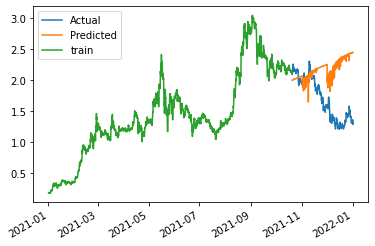

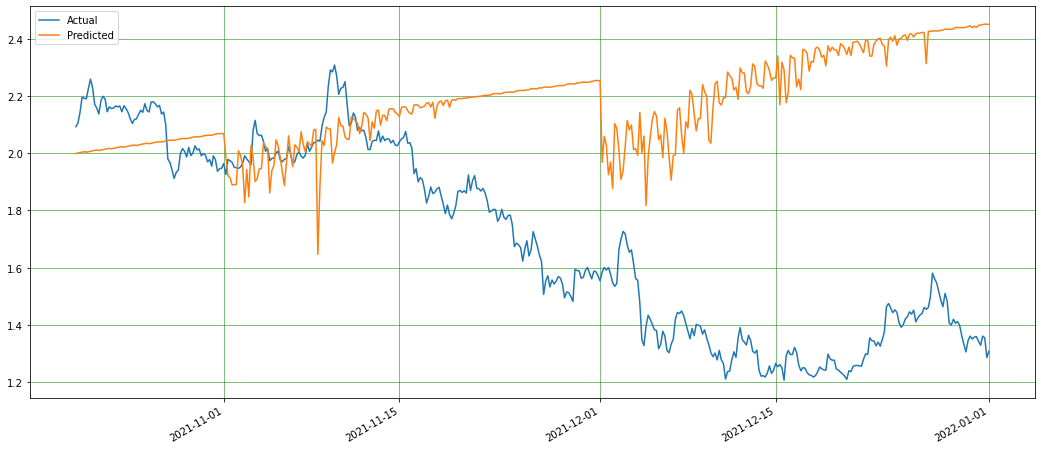

In [62]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Ridge Regression Model

### Parametrs

In [63]:
params = { 
    'alpha': [1.0,2.0,3.0,4.0],
    'max_iter':[100,200,300,400,500],
    'tol':[0.001,0.002,0.003,0.004]
}

In [64]:
%%time
Ridge=linear_model.Ridge(alpha=4.0) # calling Ridge model for training 
Model_R = RandomizedSearchCV(estimator = Ridge, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 50.1 ms


RandomizedSearchCV(cv=2, estimator=Ridge(alpha=4.0),
                   param_distributions={'alpha': [1.0, 2.0, 3.0, 4.0],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'tol': [0.001, 0.002, 0.003, 0.004]})

### Best Parameter selected

In [65]:
Model_R.best_params_

{'tol': 0.004, 'max_iter': 400, 'alpha': 4.0}

# Evaluation Measures on Test data

# MSE

In [66]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse7=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse7,5)) #pritng the results 

Mean Squared Error:  1.17761


# MAE

In [67]:
test_MAE7=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE7,5)) #pritng the results 

Mean Absolute Error:  0.97921


# RMSE

In [68]:
test_rmse7=np.sqrt(test_mse7) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse7,5)) #pritng the results 

Mean Squared Error:  1.08518


# MAPE

In [69]:
test_mape7=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape7,5)) #pritng the results 

Mean Absolute Error:  0.65473


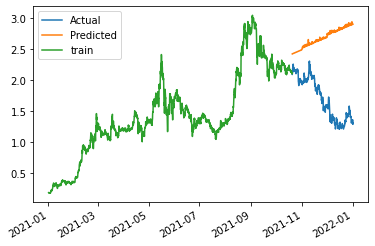

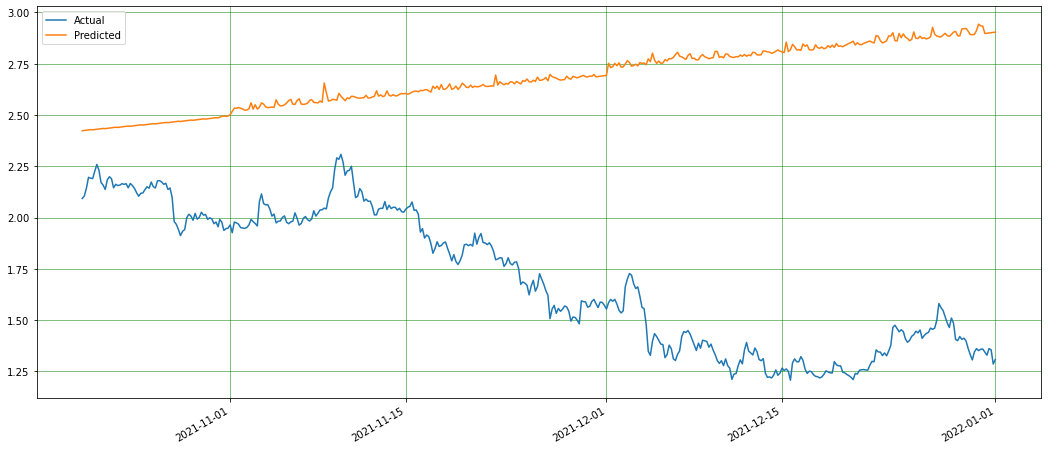

In [70]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest Regression Model

### Parametrs

In [71]:
params = { 
    'max_depth': [10,20,30,40,50],
    'random_state':[10,20,30,40],
    'min_samples_leaf':[10,20,30,40,50]
}

In [72]:
%%time
RF=RandomForestRegressor() # calling RF model for training 
Model_R = RandomizedSearchCV(estimator = RF, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 1.99 s


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'min_samples_leaf': [10, 20, 30, 40,
                                                             50],
                                        'random_state': [10, 20, 30, 40]})

### Best Parameter selected

In [73]:
Model_R.best_params_

{'random_state': 40, 'min_samples_leaf': 50, 'max_depth': 40}

# Evaluation Measures on Test data

# MSE

In [74]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse8=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse8,5)) #pritng the results 

Mean Squared Error:  0.46869


# MAE

In [75]:
test_MAE8=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE8,5)) #pritng the results 

Mean Absolute Error:  0.5984


# RMSE

In [76]:
test_rmse8=np.sqrt(test_mse8) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse8,5)) #pritng the results 

Mean Squared Error:  0.68461


# MAPE

In [77]:
test_mape8=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape8,5)) #pritng the results 

Mean Absolute Error:  0.40493


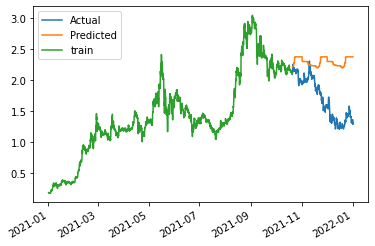

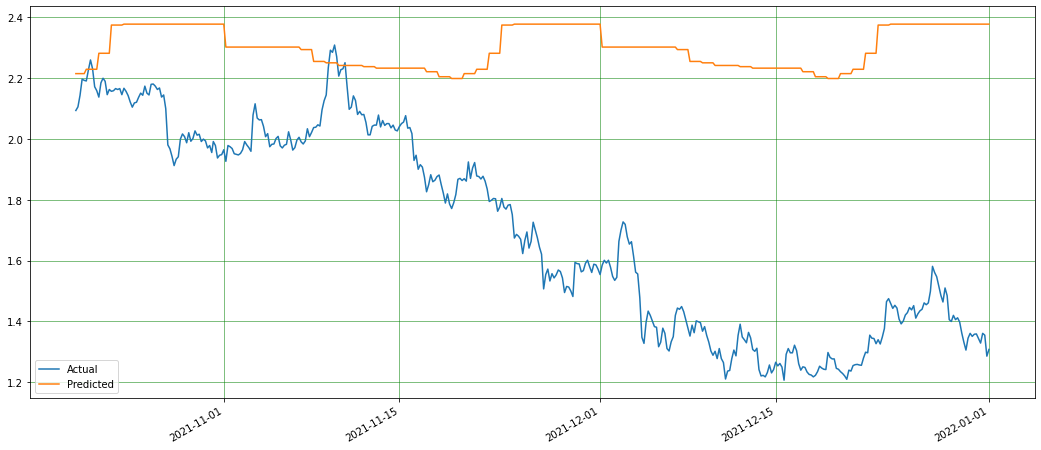

In [78]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# XGBoost Model

### Parametrs

In [79]:
params = { 
    'base_score': [0.1,0.2,0.3,0.4,0.5,0.6],
    'learning_rate':[0.1,0.2,0.3],
    'n_estimators':[100,200,300,400],
    'max_depth':[10,20,30,40,50]
    
}

In [80]:
%%time
XG=xgboost.XGBRegressor() # calling Xgboost model for training 
Model_R = RandomizedSearchCV(estimator = XG, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 6 s


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

### Best Parameter selected

In [81]:
Model_R.best_params_

{'n_estimators': 300, 'max_depth': 40, 'learning_rate': 0.2, 'base_score': 0.1}

# Evaluation Measures on Test data

# MSE

In [82]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse9=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse9,5)) #pritng the results 

Mean Squared Error:  0.34456


# MAE

In [83]:
test_MAE9=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE9,5)) #pritng the results 

Mean Absolute Error:  0.4894


# RMSE

In [84]:
test_rmse9=np.sqrt(test_mse9) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse9,5)) #pritng the results 

Mean Squared Error:  0.58699


# MAPE

In [85]:
test_mape9=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape9,5)) #pritng the results 

Mean Absolute Error:  0.33747


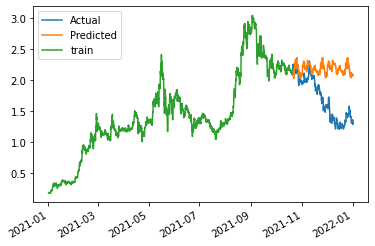

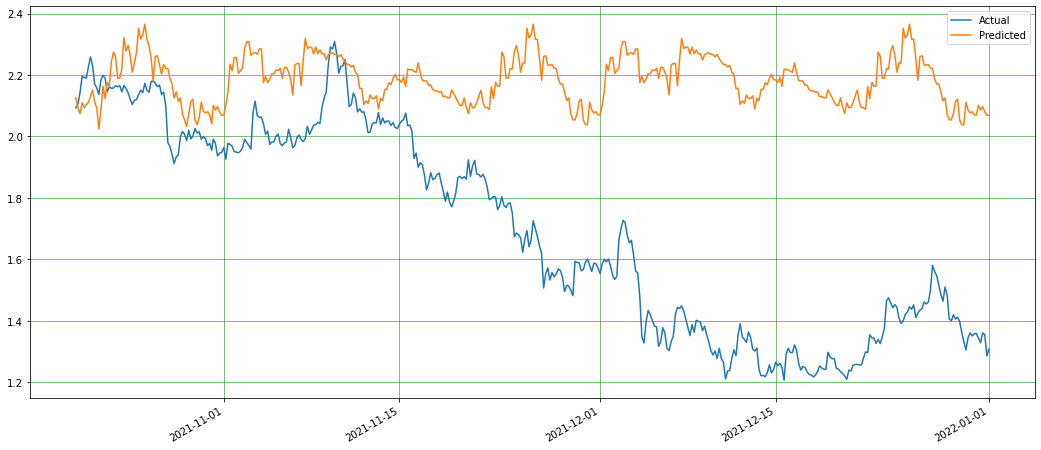

In [86]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Comparison of all algorithms Results on MSE score

In [87]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MSE score"] # for  column names 

x.add_row(["KNN Algorithm", round(test_mse1,3)]) # for the results of mse 
x.add_row(["SVR Algorithm", round(test_mse2,3)]) # for the results of mse 
x.add_row(["MLP Algorithm", round(test_mse3,3)]) # for the results of mse 
x.add_row(["Ridge Algorithm", round(test_mse7,3)]) # for the results of mse 
x.add_row(["Random Forest Algorithm", round(test_mse8,3)]) # for the results of mse 
x.add_row(["XGB Algorithm", round(test_mse9,3)]) # for the results of mse 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MSE score |
+-------------------------+-----------+
|      KNN Algorithm      |   0.021   |
|      SVR Algorithm      |   0.022   |
|      MLP Algorithm      |   0.423   |
|     Ridge Algorithm     |   1.178   |
| Random Forest Algorithm |   0.469   |
|      XGB Algorithm      |   0.345   |
+-------------------------+-----------+




# Comparison of all algorithms Results on MAE score

In [88]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAE score"] # for  column names 


x.add_row(["KNN Algorithm", round(test_MAE1,3)]) # for the results of MAE 
x.add_row(["SVR Algorithm", round(test_MAE2,3)]) # for the results of MAE 
x.add_row(["MLP Algorithm", round(test_MAE3,3)]) # for the results of MAE 
x.add_row(["Ridge Algorithm", round(test_MAE7,3)]) # for the results of MAE  
x.add_row(["Random Forest Algorithm", round(test_MAE8,3)]) # for the results of MAE 
x.add_row(["XGB Algorithm", round(test_MAE9,3)]) # for the results of MAE 
print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
|      KNN Algorithm      |   0.122   |
|      SVR Algorithm      |   0.123   |
|      MLP Algorithm      |   0.517   |
|     Ridge Algorithm     |   0.979   |
| Random Forest Algorithm |   0.598   |
|      XGB Algorithm      |   0.489   |
+-------------------------+-----------+




# Comparison of all algorithms Results on RMSE score

In [89]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "RMSE score"] # for  column names 

x.add_row(["KNN Algorithm", round(test_rmse1,3)]) # for the results of rmse 
x.add_row(["SVR Algorithm", round(test_rmse2,3)]) # for the results of rmse 
x.add_row(["MLP Algorithm", round(test_rmse3,3)]) # for the results of rmse 
x.add_row(["Ridge Algorithm", round(test_rmse7,3)]) # for the results of rmse 
x.add_row(["Random Forest Algorithm", round(test_rmse8,3)]) # for the results of rmse 
x.add_row(["XGB Algorithm", round(test_rmse9,3)]) # for the results of rmse 



print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | RMSE score |
+-------------------------+------------+
|      KNN Algorithm      |   0.146    |
|      SVR Algorithm      |   0.147    |
|      MLP Algorithm      |    0.65    |
|     Ridge Algorithm     |   1.085    |
| Random Forest Algorithm |   0.685    |
|      XGB Algorithm      |   0.587    |
+-------------------------+------------+




# Comparison of all algorithms Results on MAPE score

In [90]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAPE score"] # for  column names 

x.add_row(["KNN Algorithm", round(test_mape1,3)]) # for the results of mape 
x.add_row(["SVR Algorithm", round(test_mape2,3)]) # for the results of mape 
x.add_row(["MLP Algorithm", round(test_mape3,3)]) # for the results of mape 
x.add_row(["Ridge Algorithm", round(test_mape7,3)]) # for the results of mape 
x.add_row(["Random Forest Algorithm", round(test_mape8,3)]) # for the results of mape 
x.add_row(["XGB Algorithm", round(test_mape9,3)]) # for the results of mape 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | MAPE score |
+-------------------------+------------+
|      KNN Algorithm      |   0.078    |
|      SVR Algorithm      |   0.077    |
|      MLP Algorithm      |   0.362    |
|     Ridge Algorithm     |   0.655    |
| Random Forest Algorithm |   0.405    |
|      XGB Algorithm      |   0.337    |
+-------------------------+------------+


